# Detachment force

$F_{net} = Nf_{max} - \frac{N(N-1)}{2}k_hw\sin{\theta}$  

Non-dimensional form:  

$\hat{F}_{net} = N\hat{f}_{max} - \frac{N(N-1)}{2}\sin{\theta}$

where.

$\hat{F}_{net} = \frac{F_{net}}{k_hw}, \hat{f}_{max} = \frac{f_{max}}{k_hw}$

Condition for propogation of detachment:

$N < \frac{\hat{f}_{max}}{\sin{\theta}} - \frac{k_b}{k_h} + 1$

Alternatively:

$sin{\theta} < \frac{\hat{f}_{max}}{(N-1) + \frac{k_b}{k_h}}$

Maximum adhesion force at fixed $\theta$:

$\hat{F}_{net,max} = \frac{\hat{f}_{max}}{2}[\frac{\hat{f}_{max}}{\sin{\theta}}+1]+\frac{\sin{\theta}}{8}$

where, N at maxima is:

$N_{net,max} = \frac{\hat{f}_{max}}{\sin{\theta}} + \frac{1}{2}$


In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

# Figure 2: Effect of number of hairs

In [319]:
f_max_list = [10] #non-dimensional f_max/(k_h*w)
angle_list = [0, 5, 10, 20, 40] #degrees
k_ratio_list = [10] #k_b/k_h
N = np.logspace(np.log10(2),3, 100) #from 2 tp 1000
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        for angle in angle_list: 
            F_net_stiff = (N*f_max) - ((N*(N-1)/2)*np.sin(angle*np.pi/180))
            if angle != 0:
                N_c = (f_max/np.sin(angle*np.pi/180)) - k_ratio + 1 #critical N for propogation
                N_zero_id = np.where(N<N_c)[0]
                F_net_soft = np.array([F_net_stiff[i] if i not in N_zero_id else 0 for i in range(len(F_net_stiff))])
            else:
                F_net_soft = F_net_stiff
            df_temp = pd.DataFrame({'N': N, 'Stiff': F_net_stiff, 'Soft': F_net_soft})
            df_temp = pd.melt(df_temp, id_vars=['N'], value_vars=['Stiff', 'Soft'],
                             var_name='Type', value_name='Force')
            df_temp['angle'] = angle
            df_temp['f_max'] = f_max
            df_temp['k_ratio'] = k_ratio
            
            df = df.append(df_temp)

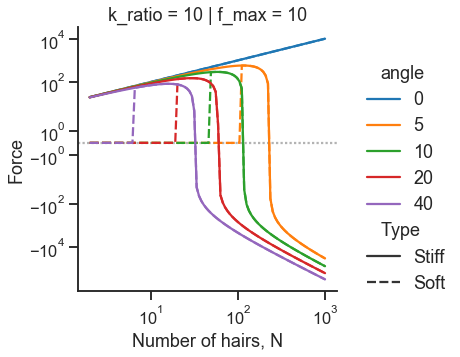

In [321]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()[:len(angle_list)]
g = sns.relplot(data=df, x = 'N', y = 'Force', hue = 'angle', style = 'Type',
                col = 'f_max', row = 'k_ratio', kind = 'line', palette = pal)
#symmetric log scale in y axis
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_xscale('log')
        ax2.set_yscale('symlog')
        ax2.minorticks_off()
        ticks_pos = np.logspace(0,4,3)
        ticks = list(-ticks_pos) + list(ticks_pos)
        ax2.set_yticks(ticks, minor = False)

g.map(plt.axhline, y=0, color=".7", dashes=(1, 1), zorder=0)
g.set_axis_labels('Number of hairs, N', 'Force')
# g.fig.set_size_inches(8, 6)
plt.show()

# Figure 3: Effect of tilt angle

In [316]:
f_max_list = [10, 20, 40, 80] #non-dimensional f_max/(k_h*w)
angle_list = np.linspace(0,90, 40) #degrees
k_ratio_list = [10] #k_b/k_h
N_max = 100
# N = np.linspace(2, N_max, N_max-1)
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        for angle in angle_list: 
#             F_net_stiff = (N*f_max) - ((N*(N-1)/2)*np.sin(angle*np.pi/180))
            angle_c = np.arcsin(f_max/(N_max-1+k_ratio))*180/np.pi
            if angle != 0:
                N_c = (f_max/np.sin(angle*np.pi/180)) - k_ratio + 1 #critical N for propogation
                N_net_max = (f_max/np.sin(angle*np.pi/180)) + 0.5 #N at F_net maxima
                if N_net_max <= N_max: #maxima should lie within N_max
                    F_max_stiff = ((f_max/2)*((f_max/np.sin(angle*np.pi/180))+1)) + (np.sin(angle*np.pi/180)/8)
                else:
                    F_max_stiff = (N_max*f_max) - ((N_max*(N_max-1)/2)*np.sin(angle*np.pi/180))
                if angle >= angle_c:
                    F_max_soft = F_max_stiff
                else:
                    F_max_soft = 0
#                 N_zero_id = np.where(N<N_c)[0]
#                 F_net_soft = np.array([F_net_stiff[i] \
#                                        if i not in N_zero_id else 0 \
#                                        for i in range(len(F_net_stiff))])
            else:
                N_c = N_max
                F_max_stiff = N_max*f_max
                F_max_soft = N_max*f_max
            
            df_temp = pd.DataFrame({'Type': ['Stiff', 'Soft'], 
                                    'Force': [F_max_stiff, F_max_soft]})
            df_temp['angle'] = angle
            df_temp['f_max'] = f_max
            df_temp['k_ratio'] = k_ratio
            df_temp['N_c'] = N_c
            df_temp['angle_c'] = angle_c
            df_temp['N'] = N_max
#             df_temp['Force'] = df_temp['Force']/N_max 
            
            df = df.append(df_temp)
# group_cols = list(df.columns.drop('N').drop('Force'))
# df_max = df.groupby(group_cols).max().reset_index()

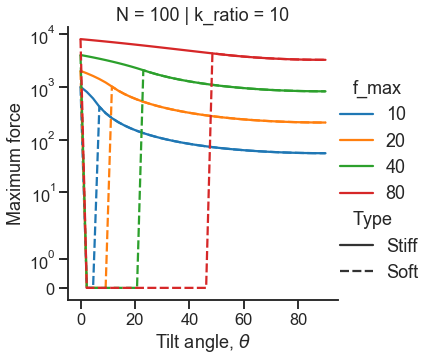

In [317]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()[:len(f_max_list)] #hue parameter
g = sns.relplot(data=df, x = 'angle', y = 'Force', hue = 'f_max', style = 'Type',
                col = 'k_ratio', row = 'N', kind = 'line', marker = None, palette = pal,
               style_order = ['Stiff', 'Soft'])
#symmetric log scale in y axis
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_yscale('symlog')
# g.fig.set_size_inches(8, 6)
g.set_axis_labels(r'Tilt angle, $\theta$', 'Maximum force')
plt.show()

# Figure 4: Critical tilt angle

In [309]:
f_max_list = [10, 20, 40, 80] #non-dimensional f_max/(k_h*w)
angle_list = np.linspace(0,30, 1) #degrees
k_ratio_list = np.logspace(-1,3, 100) #k_b/k_h
N_max = 100
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        #critical N for propogation
        angle_c = np.arcsin(f_max/(N_max-1+k_ratio))*180/np.pi
        df_temp = pd.DataFrame({'angle_c': [angle_c],
                               'f_max': [f_max],
                               'k_ratio': [k_ratio],
                               'N': [N_max]})
        df = df.append(df_temp)

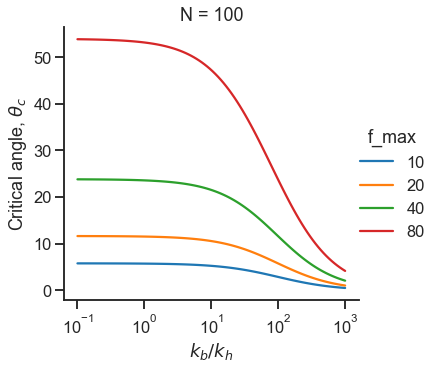

In [314]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()[:len(f_max_list)] #hue parameter
g = sns.relplot(data = df, x = 'k_ratio', y = 'angle_c', hue = 'f_max',
                col = 'N', kind = 'line', marker = None, palette = pal)
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_xscale('log')
        ax2.minorticks_off()
# g.fig.set_size_inches(8, 6)
g.set_axis_labels('$k_b/k_h$', r'Critical angle, $\theta_c$')
plt.show()